In [93]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [94]:
df=pd.read_csv('train.csv')

In [123]:
#拆分数据集
df_train=df.iloc[:14000,:]
df_cv=df.iloc[14000:,:]

In [45]:
#X是样本矩阵 o*n o是样本个数 n是特征数
X=df_train.iloc[:,2:]
o=X.shape[0]
#插入第一列为1 作为w_0的系数
X.insert(0,'x_0',1)
#labels是分类的类别
labels=df['label'].unique()
m=len(labels)

In [52]:
#数据太大，导致做指数运算时溢出
X/=255
#权重矩阵 m*n m是分类数
W=np.ones((m,X.shape[1]))

In [148]:
X

,x_0,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13996,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13997,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13998,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
def compute_softmax(X,W):
    #softmax计算后得到矩阵Q o*m 分子G 分母G*E
    g=np.dot(X,W.T)
    c=g.max()
    G=np.exp(g-c)
    #E1 m*1 用于求和
    E1=np.ones((G.shape[1],1))
    Q=G/np.dot(G,E1)
    return Q

In [72]:
#P实际发生概率矩阵 o*m 样本数乘上类别数
P=np.zeros((o,m))
for i in range(o):
    P[i,df.loc[i,'label']]=1

In [73]:
#计算LOSS P(o*m)Q.T(m*o)->(o*o) 取对角线元素
def compute_loss(Q,P):
    log_q_t=np.log(Q.T)
    s=np.dot(P,log_q_t)
    E2=np.ones((s.shape[0],1))
    eye=[]
    for i in range(o):
        eye.append(s[i,i])
    L=(1/X.shape[0])*np.dot(eye,E2)
    return L

In [74]:
#梯度下降
def gradient_descent(X,W,P,Q,compute_loss,compute_softmax,iters,alpha):
    L_history=[]
    
    for i in range(iters):
        D=np.dot((P-Q).T,X)
        W = W + alpha*D
        Q=compute_softmax(X,W)
        L_history.extend(compute_loss(Q,P))
        if(i%math.ceil(iters/10)==0):
            print(f"Iteration:{i:4d};loss{L_history[-1]:8.2f}")
    return W,L_history

In [108]:
iterations=1000
alpha=0.12
err=0
Q=compute_softmax(X,W)
W_final,L_hist=gradient_descent(X,W,P,Q,compute_loss,compute_softmax,iterations,alpha)

Iteration:   0;loss   -2.27
Iteration: 100;loss   -1.04
Iteration: 200;loss   -0.77
Iteration: 300;loss   -0.65
Iteration: 400;loss   -0.59
Iteration: 500;loss   -0.55
Iteration: 600;loss   -0.51
Iteration: 700;loss   -0.49
Iteration: 800;loss   -0.47
Iteration: 900;loss   -0.46


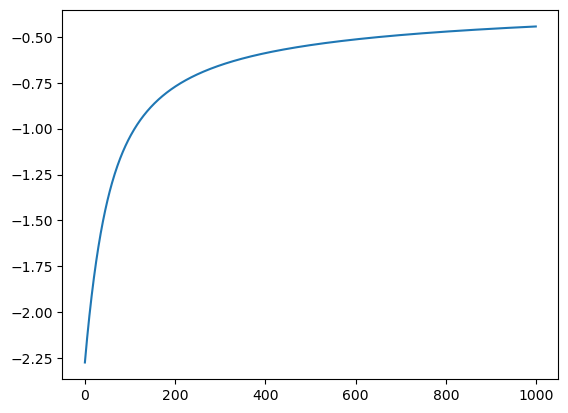

In [109]:
i=[i for i in range(0,1000)]
plt.plot(i,L_hist)

In [110]:
predict_label=[]
Q_predict=compute_softmax(X,W_final)
for i in range(o):
    predict_label.append(np.argmax(Q_predict[i]))
    if predict_label[i]!=df['label'][i]:
        err+=1
err_percentage=err/o

In [111]:
err_percentage

0.11171428571428571

In [139]:
W_final

array([[0.91536782, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.14525116, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.96790608, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.09713467, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.77941687, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.9484853 , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [149]:
X_cv=df_cv.iloc[:,2:]
X_cv.insert(0,'x_0',1)
X_cv/=255
X_cv/=255
cv_labels=df_cv.iloc[:,1]
X_cv

,x_0,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
14000,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14001,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14002,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14003,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14004,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
Q_cv=compute_softmax(X_cv,W_final)

In [155]:
predict_cv=[]
err2=0
for i in range(X_cv.shape[0]):
    predict_cv.append(np.argmax(Q_cv[i]))
    if predict_cv[i]!=df['label'][i+14000]:
        err2+=1
err_percentage=err2/X_cv.shape[0]

In [164]:
df_test=pd.read_csv('test_no_answer.csv')

In [165]:
X_test=df_test.iloc[:,1:]

In [168]:
X_test.insert(0,'x_0',1)
X_test/=255
X_test/=255

In [181]:
Q_test=compute_softmax(X_test,W_final)
predict_test=[]
for i in range(X_test.shape[0]):
    predict_test.append(np.argmax(Q_test[i]))
len(predict_test)

2000

In [182]:
submission=pd.DataFrame(pd.Series(range(1,X_test.shape[0]+1),name='id'))
submission['label']=pd.Series(predict_test)

In [185]:
submission.to_csv('submission3.csv',index=False)